# Iris
## Classification - Decision Tree
### 사용 라이브러리

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Data Load

In [2]:
iris = load_iris()
iris_data = iris.data # feature만으로 된 데이터
iris_label = iris.target # label 데이터

df_iris = pd.DataFrame(data=iris_data, columns=iris.feature_names)
df_iris["label"] = iris.target
df_iris.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
29,4.7,3.2,1.6,0.2,0
89,5.5,2.5,4.0,1.3,1
37,4.9,3.6,1.4,0.1,0
45,4.8,3.0,1.4,0.3,0
140,6.7,3.1,5.6,2.4,2


### 학습

In [8]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.1, random_state=42)

In [9]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf

DecisionTreeClassifier(random_state=42)

In [10]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [11]:
y_predict = dt_clf.predict(X_test)

In [12]:
accuracy_score(y_test, y_predict)

1.0

데이터 셋의 크기가 작은것이 성능에 영향을 많이 준듯..

### 모델 분석

In [28]:
features_names = df_iris.columns.tolist()
features_names.remove("label")
features_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

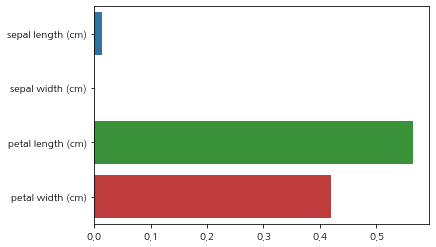

In [29]:
_ = sns.barplot(x=dt_clf.feature_importances_, y=features_names)

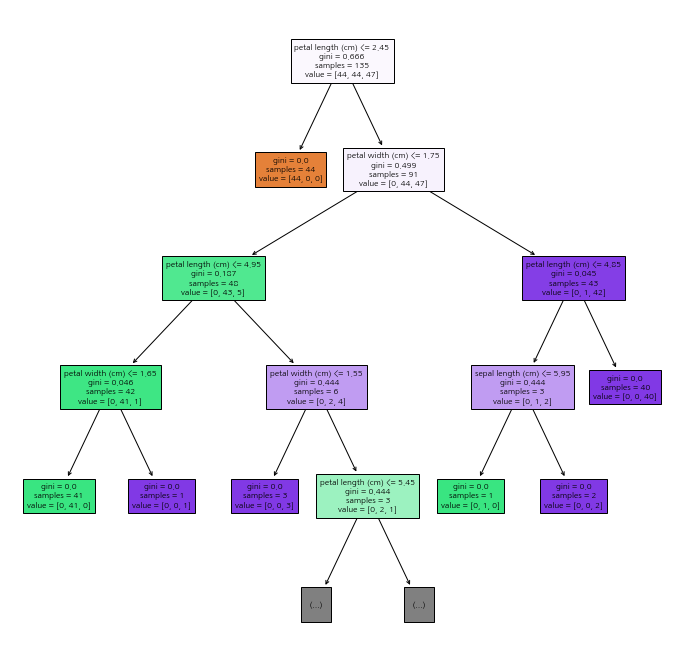

In [31]:
plt.figure(figsize=(12, 12))
pt = plot_tree(dt_clf, filled=True, fontsize=8, feature_names=features_names, max_depth=4)
plt.show()